In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import matplotlib
from tqdm import tqdm
from skimage.filters import threshold_otsu
import matplotlib as mpl
matplotlib.rcParams['figure.figsize'] = (10, 10)
from sklearn import metrics
import odl
import scipy.signal
import astra
import scipy.sparse.linalg


In [2]:
def load_volume(filepath):
    files = [file for file in np.sort(listdir(filepath)) if file.endswith(".npy")]
    height, width = np.load(join(filepath,files[0])).shape
    depth = len(files)
    volume = np.zeros((depth, height, width))
    for i,file in tqdm(enumerate(files)):
        volume[i,:,:] = np.load(join(filepath,file))

    volume = volume[:,:,:].astype('float32')
    return volume

volume_all = load_volume("../PhantomGenerator/output/slow_fast_no_rotation")
volume_rapid = load_volume("../PhantomGenerator/output/fast_no_rotation")
volume_slow = load_volume("../PhantomGenerator/output/slow_no_rotation")

240it [00:00, 450.35it/s]
240it [00:00, 416.65it/s]
240it [00:00, 432.74it/s]


In [3]:
volume_all.shape

(240, 512, 512)

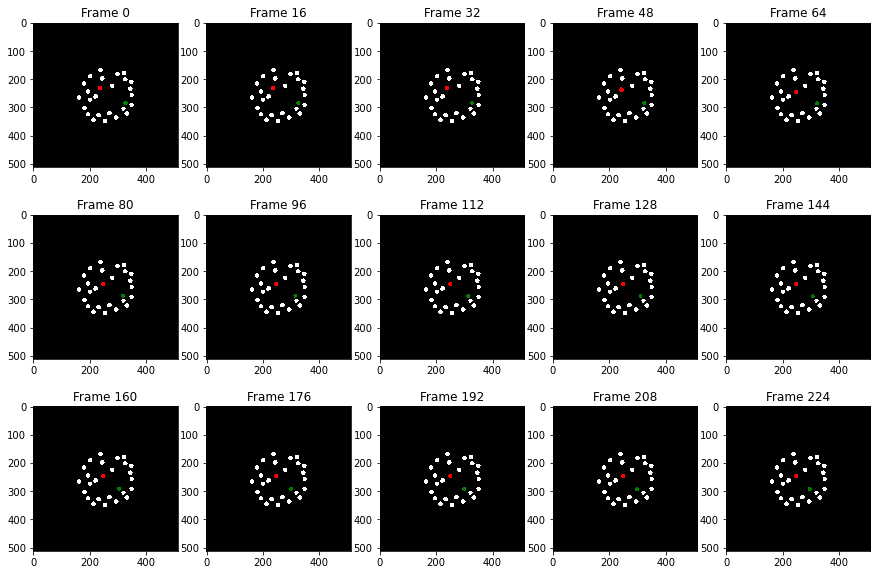

In [4]:
thresh = 0

mask_all = np.zeros_like(volume_all)
mask_all[volume_all > thresh] = 1
mask_all[volume_rapid > thresh] = 2
mask_all[volume_slow > thresh] = 3

cmap = mpl.colors.ListedColormap(['black', 'white', 'red', 'green'])

bounds = [-0.5, 0.5, 1.5, 2.5, 3.5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


fig, axes = plt.subplots(ncols=5, nrows=3, figsize = (15,10))


for i,f in enumerate(range(0,240,16)):
    ax = axes.ravel()
    ax[i].imshow(mask_all[f], cmap=cmap, norm = norm, interpolation='none')
    ax[i].set_title(f'Frame {f}')


plt.show()

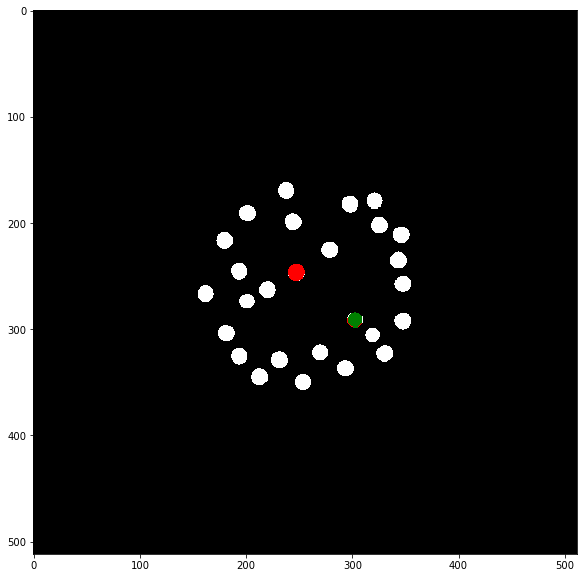

In [5]:
plt.imshow(mask_all[160], cmap=cmap)

norm

In [6]:
y_true = [0, 1, 0, 1, 0, 1]
y_pred = [0, 0, 0, 1, 0, 1]
metrics.confusion_matrix(y_true, y_pred)

array([[3, 0],
       [1, 2]])

In [7]:
volume = load_volume("../PhantomGenerator/output/slow_fast").astype('float32')

240it [00:00, 337.53it/s]


(-0.5, 29.5, 511.5, -0.5)

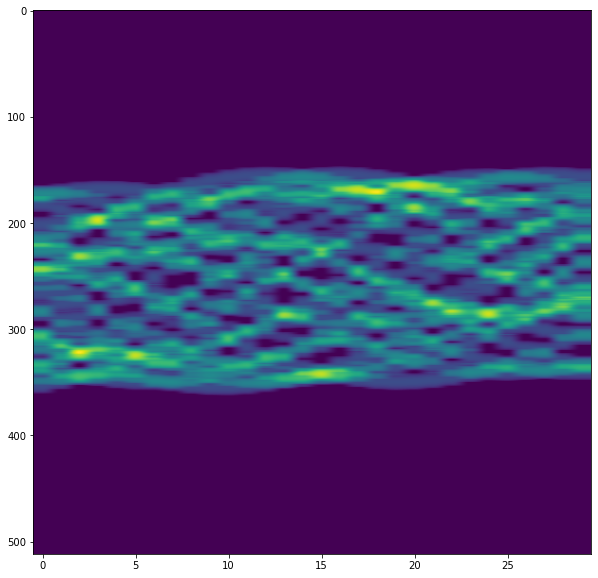

In [9]:
volume.shape
split = np.lib.stride_tricks.sliding_window_view(volume[:,230,:],30, axis=0)
plt.imshow(split[0])
plt.axis("auto")